In [797]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import normalize
import random


givenPoints = np.array ( 
    [[-171.60,4.00,0.00],
[-206.40,4.20,0.00],
[-255.90,0.20,0.00],
[-272.10,-43.90,0.00],
[-205.50,-95.00,0.00],
[-185.50,-142.40,0.00],
[-151.10,-151.00,0.00],
[-101.40,-154.70,0.00],
[-47.80,-117.20,0.00],
[-43.80,-56.80,0.00],
[-43.90,-17.10,0.00],
[3.00,-2.70,0.00],
[47.80,-1.80,0.00],
[89.00,-5.50,0.00],
[45.90,-84.90,0.00],
[31.30,19.30,0.00],
[36.30,67.20,0.00],
[38.60,155.10,0.00],
[74.00,190.20,0.00],
[154.10,177.30,0.00],
[189.20,52.80,0.00],
[174.40,-148.00,0.00],
[10.20,-187.90,0.00],
[-145.80,-190.90,8.60],
[-232.60,28.10,10.00],
[-119.40,186.60,10.00],
[84.70,144.10,0.00],
[148.10,112.20,0.00],
[151.40,15.20,0.00],
[124.70,1.90,0.00],
[96.20,-28.60,0.00],
[-9.50,-88.30,0.00],
[-83.20,-87.70,0.00],
[-124.30,-42.40,0.00],
[-121.80,28.10,0.00],
[-124.40,106.30,0.00],
[-80.20,133.30,0.00],
[-20.70,87.90,0.00],
[25.70,65.40,0.00],
[24.60,-30.70,0.00]
])


edges = np.array([[28,29],
[58,29],
[30,58],
[30,52],
[52,14],
[52,31],
[31,68],
 [68,15],
[15,46],
[46,32],
[46,45],
[44,45],
[58,44],
[52,48],
[48,49],
[18,49],
[14,13],
[13,47],
[47,16],
[12,47],
[47,40],
[40,46],
[16,39],
[39,17],
[17,49],
[38,49],
[50,38],
[12,53],
[50,37],
[37,57],
[23,67],
[67,45],
[8,9],
[59,9],
[33,59],
[59,10],
[10,11],
[11,53],
[53,50],
[50,51],
[51,36],
[19,43],
[36,57],
[51,35],
[19,20],
[54,53],
[54,35],
[34,55],
[55,33],
[54,1],
[1,64],
[57,63],
[63,62],
[62,64],
[62,65],
[65,3],
[64,2],
[2,3],
[3,4],
[4,60],
[60,5],
[5,66],
[66,55],
[61,25],
[51,62],
[25,41],
[41,24],
[24,23],
[67,22],
[22,21],
[21,21],
[32,59],
[6,66],
[43,18],
[34,54],
[26,43],
[26,42],
[6,7],
[7,56],
[56,8],
[20,21],
[42,61],
[18,27],
[27,28],
[56,55],
[64,66]
])

intersections = np.array ( [
    [-229, -143],
 [-210 , 156],
 [  38 , 187],
 [ 140 ,-123],
 [  35 ,-141],
 [  35 , -92],
 [  29 ,  -3],
 [  96 ,  72],
 [  37 ,  91],
 [ -44 ,  88],
 [-121 ,  85],
 [ 105 ,  -3],
 [ -40 ,   2],
 [-119 ,  -4],
 [-121 , -93],
 [-121, -147],
 [-120 , 138],
 [ 154 ,  -6],
 [ -44 , -89],
 [-244,  -86],
 [-243 ,  82],
 [-186  , 88],
 [-173 , 137],
 [-186 ,   2],
 [-247  , 76],
 [-184 , -93],
 [  35 ,-189],
 [  92 , -72]
 ])

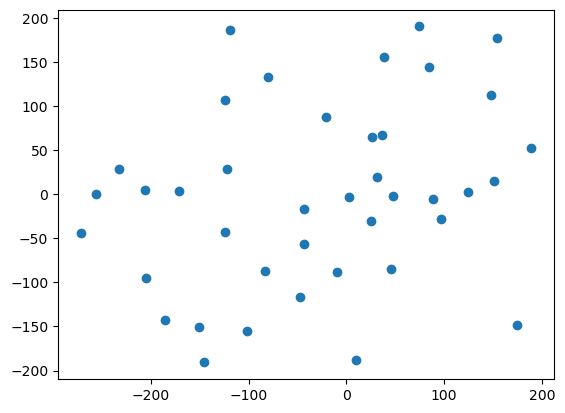

In [798]:
y = givenPoints[:,0:2]


plt.scatter(y[:,0],y[:,1])
plt.show()

In [799]:
def traslate(point,a=1.45,b=399,c =-1.44 ,d =308):
    x,y = point
    return int (a*x+b) ,  int (c*y+d)

In [800]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 0.5
fontColor              = (255,0,0)
thickness              = 1
lineType               = 1


img = cv2.imread("img.png")
c = 1

for x,y,_ in givenPoints:
    x,y = traslate(point=(x,y))

    bottomLeftCornerOfText = (x+12,y+12)
    cv2.putText(img, str(c), bottomLeftCornerOfText, font,fontScale,fontColor,thickness, lineType)
    img = cv2.circle(img, (x, y), 3, (00,255,255), 2)
    c+=1



In [801]:
def get_point(s):
    s-=1
    if (s>39):
        point = (intersections[s%40][0],intersections[s%40][1])
    else:
        point = (givenPoints[s][0],givenPoints[s][1])
        
    return point

True

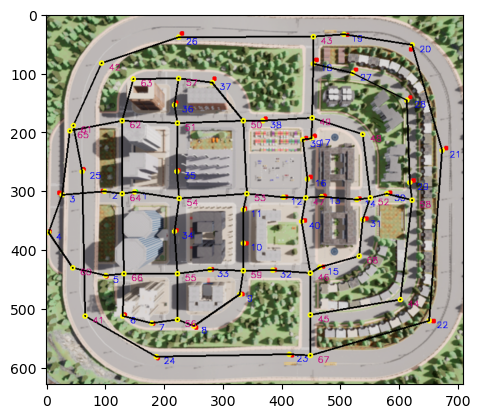

In [802]:

NewC = c
imgcopy = img

for s,d in edges:    
    cv2.line(imgcopy, traslate(point= get_point(s)), traslate(point= get_point(d)), (0,0,0), 2)
    
for x,y in intersections:
    x,y = traslate(point= (x, y))

    bottomLeftCornerOfText = (x+12,y+12)
    cv2.circle(imgcopy, (x, y), 3, (00,255,255), 2)
    cv2.putText(imgcopy, str(NewC), bottomLeftCornerOfText, font,fontScale,(120,0,200),thickness, lineType)
    
    NewC+=1

plt.imshow(imgcopy[:,:,::-1])

cv2.imwrite('out.png', imgcopy)

In [803]:
graphList = {}


for s, d in edges:
    
    dis = math.dist(get_point(s),get_point(d))
    if str(s) in graphList and  str(d) in graphList:
        graphList[str(s)].append((d,dis))
        graphList[str(d)].append((s,dis))
        
    elif str(s) in graphList:
        graphList[str(s)].append((d,dis))
        graphList[str(d)] = [(s,dis)]
    elif str(d) in graphList: 
        graphList[str(d)].append((s,dis))
        graphList[str(s)] = [(d,dis)]     
    else:
        graphList[str(s)] = [(d,dis)]
        graphList[str(d)] = [(s,dis)]   
        
print( (graphList["28"]))            
    

[(29, 97.0561177875975), (27, 70.97302304397071)]


In [804]:
TotalNodeCount = givenPoints.shape[0] + intersections.shape[0]

graphMarix = np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=float)
graphMarix = graphMarix * float('inf')

for s, d in edges:
    dis = math.dist(get_point(s),get_point(d))
    
    graphMarix[s][d] = dis
    graphMarix[d][s] = dis

np.fill_diagonal(graphMarix,0)
graphMarix[0][0] = float('inf')


print(graphMarix[10][11])




39.70012594438461


In [805]:
dp = graphMarix

next =  np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=int)
next = next * -1

for j in range (1, TotalNodeCount+1):
    for i in range (1, TotalNodeCount+1):
        if (dp[j][i] != float('inf') ):
            next[j][i] = i 


In [806]:
for k in range (1, TotalNodeCount+1):
    for j in range (1, TotalNodeCount+1):
        for i in range (1, TotalNodeCount+1):
            if (dp[j][k]  + dp[k][i] < dp[j][i] ):
               dp[j][i] =  dp[j][k]  + dp[k][i]
               next[j][i] = next[j][k]      
                

In [807]:
def getPath(start, end, ans = None):
    if (ans == None):
        ans = [start]
    else:
        ans.append(start)

    if (start == end):
        return np.array (ans)
    start = next[start][end]
    return getPath(start, end,ans)

    
x = getPath(start = 12, end =47, ans = None)
print (x[x.shape[0]-2])

12


In [808]:
def caclCostOrder (order):
    
    n = order.shape[0]
    ans = 0.0
    for i in range(n-1):
        ans+= dp[order[i]][order[i+1]]
        
    
    
    return 1000.0/ans +0.0001

def pelanty (prev, cur, next):
    pathPrevCur = getPath(start = prev, end =cur, ans = None)
    prev = pathPrevCur[pathPrevCur.shape[0]-2]

    x0, y0 = get_point(prev)
    x1, y1 = get_point(cur)
    x2, y2 = get_point(next)

    ans = 0.0

    #if ((x1- x0) *(x2 - x1) < 0 ):
        #ans+=100

    #if ((y1- y0) *(y2 - y1) < 0 ):
        #ans+=100

    return ans

    
def caclCostOrderCircle(order):
    global gmin
    global gorder
    ans = 0.0

    n = order.shape[0]
    
    for i in range(n-1):
        ans+= dp[order[i]][order[i+1]]

        '''if (i==0):
            ans += pelanty (1, order[i], order[i+1])
        elif (i==n-1):
            ans += pelanty (order[i-1], order[i], 1)
        else:
            ans += pelanty (order[i-1], order[i],order[i+1])'''

 
        
    ans+= dp[1][order[0]] + dp[1][order[n-1]] 
    
    
    if (ans < gmin):
        gorder= order
        gmin = ans


    return 1/ans


In [809]:
NofPop = 20

SizeOfP = 7



gorder= None

gmin = float('inf') 

#caclCostOrderCircle(gorder)



In [810]:
gmin

inf

In [811]:


def firstGen ():
    population = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)
    cost =  np.ndarray( NofPop, dtype=float)
    ordered = np.array([63, 57 ,51, 54, 64, 62])
    #ordered =np.arange(2,SizeOfP+1)
    
    for i in range(NofPop):
        shuffeled = ordered
        np.random.shuffle(shuffeled)

        
        for k in range (SizeOfP):
            if (random.uniform(0, 1) < 0.3):
                x = random.randrange(SizeOfP-1)
                y = (x+1) % (SizeOfP-1)
                shuffeled[y], shuffeled[x] =shuffeled[x], shuffeled[y]

        population[i]= shuffeled 
       # population[i]= shuffeled 
        cost[i] = caclCostOrderCircle(shuffeled) 

        #population[i] = gmin

        


        #cost[i] = caclCostOrderCircle(population[i]) 

        
    NormCost = (cost/cost.sum(axis=0,keepdims=1))**15
    NormCost = NormCost/NormCost.sum(axis=0,keepdims=1)
    return population , NormCost 


In [812]:
population , NormCost  = firstGen()



In [813]:
print(gmin)

622.4961393391472


In [814]:
def pickOne (population, NormalizedArrayOfProbalites):

    idx = 0
    r = random.uniform(0, 1)
    


    while (r >= 0):
        r = r - NormalizedArrayOfProbalites[idx]
        idx+=1    
    return population[min (idx,NofPop-1)]
    

In [815]:
print(population[0][0])

print (gorder[0])

51
51


In [816]:
def crossOver (orderA,orderB):
    start = random.randrange(SizeOfP -2)
    end = random.randrange(start +1 , SizeOfP+1)
    
    orderA = orderA[start:end+1]

    for i in range (SizeOfP-1):
        if (not (orderB[i]  in orderA)):
            orderA = np.insert(orderA, orderA.shape[0], orderB[i])
    return orderA
        

In [817]:
def genNewGen (population, NormalizedArrayOfProbalites):
    
    newpopulation = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)
    newNormalizedArrayOfProbalites =  np.ndarray( NofPop, dtype=float)
    
    for i in range(NofPop):
        orderA =   pickOne (population, NormalizedArrayOfProbalites)
        orderB =  pickOne (population, NormalizedArrayOfProbalites)
 
        
        order = crossOver (orderA,orderB)

        
      
        for k in range (SizeOfP):
            if (random.uniform(0, 1) < 0.2):
                x = random.randrange(SizeOfP-1)
                y = (x+1) % (SizeOfP-1)
                order[y], order[x] = order[x], order[y]


        newpopulation[i] = order
        newNormalizedArrayOfProbalites[i] = caclCostOrderCircle(order )
    
    newNormalizedArrayOfProbalites =( newNormalizedArrayOfProbalites/newNormalizedArrayOfProbalites.sum(axis=0,keepdims=1))**15
    newNormalizedArrayOfProbalites = newNormalizedArrayOfProbalites/newNormalizedArrayOfProbalites.sum(axis=0,keepdims=1)
        
    return population, newNormalizedArrayOfProbalites

In [818]:
for i in range (0):
    population , NormCost  = genNewGen (population , NormCost)


In [819]:
print(gorder)

#gorder = np.insert(gorder, 0, 1)
#gorder = np.insert(gorder, gorder.shape[0], 1)

print (gorder)

[51 54 63 57 62 64]
[51 54 63 57 62 64]


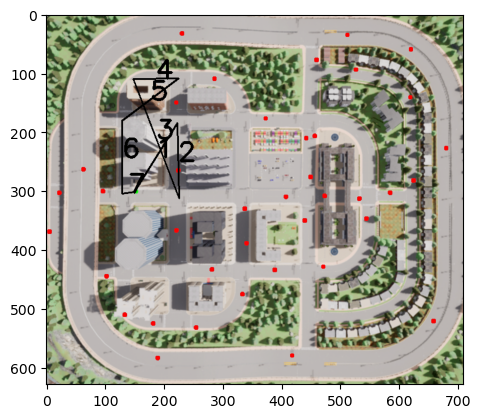

In [820]:
def drawBestPath():
    global gorder
    img = cv2.imread("img.png")
    #finalpath =  np.array([1,5,6])
    n = gorder.shape[0]

    imgcopy = img
    c = 1



    for i in range (-1,n):
        if (i==-1):
            s=1
            d= int (gorder[i+1])
        elif i==n-1:
            s =  int (gorder[i])
            d = int (1)
        else:
            s =  int (gorder[i])
            d = int (gorder[i+1])

        sx, sy = traslate(point= get_point(s))
        dx, dy = traslate(point= get_point(d))
    
        center = (int ((sx+dx)/2) , int ((sy+dy)/2))
        cv2.putText(imgcopy, str(c), center, font,fontScale*3,(0,0,0),thickness*4, lineType)

        cv2.line(imgcopy, (sx,sy), (dx,dy), (0,0,0), 2)
        c+=1
        
    
    return imgcopy

plt.imshow (drawBestPath()[:,:,::-1])

In [821]:
cv2.namedWindow('img')
c = 0
while True:

    global population
    global NormCost
    population , NormCost  = genNewGen (population , NormCost)

    
    c+=1
    
    img = drawBestPath()
    cv2.putText(img, "iteration: " + str(c)+ "  min dis: " + "{:.2f}".format(gmin), (20,40), font,fontScale*2,(0,0,0),thickness*5, lineType)
    cv2.imshow('img',img)

    k = cv2.waitKey(1)
    if k==ord('q'):
        break
  

cv2.destroyAllWindows()

print(gorder)
#[11 16 13 12 27 18 20 25 23 15 36  4  8 34  2]

[54 51 57 63 62 64]


In [586]:
print(gorder)

#gorder = np.insert(gorder, 0, 1)
#gorder = np.insert(gorder, gorder.shape[0], 1)

print (gorder)

[64 63 57 62 51 54]
[64 63 57 62 51 54]


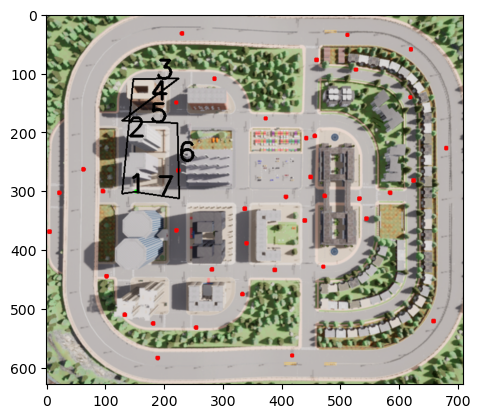

In [587]:
plt.imshow (drawBestPath()[:,:,::-1])

In [588]:
print (dp[1][54]+dp[54][55]+dp[55][66]+dp[64][66] +dp[64][1])

315.2356870026816


In [589]:
##[ 1  2 36 12 16 20 27 18 25 23 15 13 11 34  8  4  1]

In [590]:
finalpath = getPath(1, gorder[0], ans = None)

n = gorder.shape[0]

for i in range (n-1):
    finalpath = np.concatenate( (finalpath, getPath( gorder[i],gorder[i+1], ans = None)), axis=None  )

finalpath = np.concatenate( (finalpath, getPath( gorder[n-1],1, ans = None)), axis=None  )  
print(finalpath)
    


[ 1 64 64 62 63 63 57 57 63 62 62 51 51 35 54 54  1]


In [591]:
newfinalPath = np.array([])


for i in range (finalpath.shape[0]):
    if (newfinalPath.shape[0] == 0 or finalpath[i]!= newfinalPath [ newfinalPath.shape[0] -1]):
        newfinalPath = np.insert(newfinalPath, newfinalPath.shape[0], finalpath[i])
    

finalpath= newfinalPath
finalpath

array([ 1., 64., 62., 63., 57., 63., 62., 51., 35., 54.,  1.])

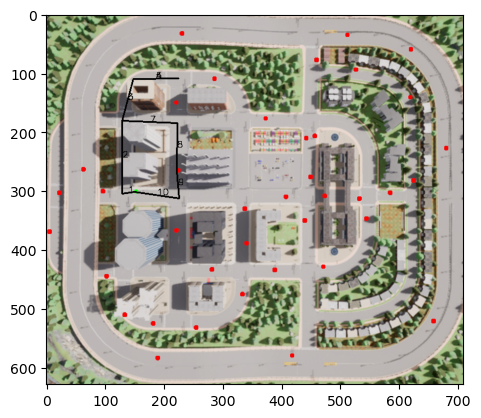

In [592]:
img = cv2.imread("img.png")
#finalpath =  np.array([1,5,6])
n = finalpath.shape[0]

imgcopy = img
c = 1

for i in range (n-1):
    
    s =  int (finalpath[i])
    d = int (finalpath[i+1])
    sx, sy = traslate(point= get_point(s))
    dx, dy = traslate(point= get_point(d))
    
    center = (int ((sx+dx)/2) , int ((sy+dy)/2))
    cv2.putText(imgcopy, str(c), center, font,fontScale,(0,0,0),thickness, lineType)

    cv2.line(imgcopy, (sx,sy), (dx,dy), (0,0,0), 2)
    c+=1
    

plt.imshow(imgcopy[:,:,::-1])

In [593]:
'''
def add(x, y):
    global intersections
    intersections = np.vstack([intersections, [x,y]])
    return


def nothing(y):
    pass



cv2.namedWindow('img')

cv2.createTrackbar('x', 'img',-300,600,nothing)
cv2.createTrackbar('y', 'img',-300,600,nothing)


while True:
    x = cv2.getTrackbarPos('x', 'img')-300
    y = cv2.getTrackbarPos('y', 'img')-300


    imgr = cv2.imread("img.png")

    
    imgr = cv2.circle(imgr, traslate( point=(x, y)), 15, (255, 0, 0), 2)

    for i,j in intersections:
        imgr = cv2.circle(imgr, traslate (point=(i, j)), 15, (255, 255, 0), 2)

    
    cv2.imshow('img',imgr)

    k = cv2.waitKey(1)
    if k==ord('q'):
        break
    elif k==ord('s'):
        add(x,y)

cv2.destroyAllWindows()
print(intersections)'''


'\ndef add(x, y):\n    global intersections\n    intersections = np.vstack([intersections, [x,y]])\n    return\n\n\ndef nothing(y):\n    pass\n\n\n\ncv2.namedWindow(\'img\')\n\ncv2.createTrackbar(\'x\', \'img\',-300,600,nothing)\ncv2.createTrackbar(\'y\', \'img\',-300,600,nothing)\n\n\nwhile True:\n    x = cv2.getTrackbarPos(\'x\', \'img\')-300\n    y = cv2.getTrackbarPos(\'y\', \'img\')-300\n\n\n    imgr = cv2.imread("img.png")\n\n    \n    imgr = cv2.circle(imgr, traslate( point=(x, y)), 15, (255, 0, 0), 2)\n\n    for i,j in intersections:\n        imgr = cv2.circle(imgr, traslate (point=(i, j)), 15, (255, 255, 0), 2)\n\n    \n    cv2.imshow(\'img\',imgr)\n\n    k = cv2.waitKey(1)\n    if k==ord(\'q\'):\n        break\n    elif k==ord(\'s\'):\n        add(x,y)\n\ncv2.destroyAllWindows()\nprint(intersections)'